In [1]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt

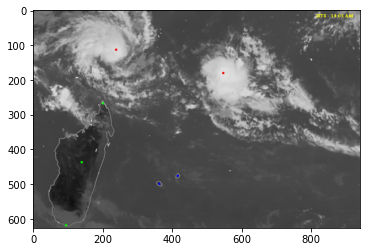

In [3]:
# Lets first calculate the centres of the islands
img1 = Image.open('./1.jpg')
img1 = np.array(img1)
plt.imshow(img1)

In [4]:
# dimensions of the image ( m X n )
m = len(img1)
n = len(img1[0])
print(m)
print(n)

626
940


In [5]:
# Let us define a function to give central coordinates of a particular color in a given location , in an image

def find_center(color , x1 , x2 , y1 , y2 , IMG):
    # Lets call the island c1
    
    # selecting a neighbourhood close to the color spot
    c1 = IMG[x1:x2,y1:y2]
    c1_coords = []

    # coordintes to store the center of the spot
    c1_x = 0
    c1_y = 0

    # threshold values for dominant color and cut offs for other colors
    thres = 210
    cut_off = 30

    for i in range(len(c1)):
        for j in range(len(c1[0])):
            r = c1[i][j][0]
            g = c1[i][j][1]
            b = c1[i][j][2]
        
            if color==0:
                # red color
                if r>=thres and g<=cut_off and b<=cut_off:
                    c1_coords.append([i , j])
        
            if color==1:
                # green color
                if g>=thres and r<=cut_off and b<=cut_off:
                    c1_coords.append([i , j])
        
            if color==2:
                # blue color
                if b>=thres and g<=cut_off and r<=cut_off:
                    c1_coords.append([i , j])

    # taking the centroid of these pixels to determine the approximate location of island
    for coord in c1_coords:
        c1_x = c1_x + coord[0]
        c1_y = c1_y + coord[1]

    c1_x = x1 + c1_x // len(c1_coords)
    c1_y = y1 + c1_y // len(c1_coords)

    return [c1_x , c1_y]

In [7]:
[g1_x , g1_y] = find_center(1 , 240, 300, 180, 220 , img1)
print(f'centre of Antsiranana is at {g1_x} , {g1_y}')

centre of Antsiranana is at 267 , 200


In [8]:
[g2_x , g2_y] = find_center(1 , 600, 625, 70 ,140 , img1)
print(f'centre of benonoka is at {g2_x} , {g2_y}')

centre of benonoka is at 617 , 94


In [9]:
# calculating the distance to pixel ratio for left side

actual_distance = 1500 # given
pixel_distance = ((g1_x-g2_x)**2 + (g1_y-g2_y)**2) ** 0.5

# ratio on the left side
r1 = actual_distance / pixel_distance
print(f'{r1} km / pixels')

4.101730237759558 km / pixels


In [10]:
[b1_x , b1_y] = find_center(2 , 480, 520, 350,400 , img1)
print(f'centre of reunion is at {b1_x} , {b1_y}')

centre of reunion is at 498 , 362


In [11]:
[b2_x , b2_y] = find_center(2 , 450, 500,400, 450 , img1)
print(f'centre of mauritius is at {b2_x} , {b2_y}')

centre of mauritius is at 475 , 415


In [12]:
# calculating the distance to pixel ratio on the right half
actual_distance = 250 # given
pixel_distance = ((b1_x-b2_x)**2 + (b1_y-b2_y)**2) ** 0.5

# ratio on the left side
r2 = actual_distance / pixel_distance
print(f'{r2} km / pixels')

4.327099108943766 km / pixels


In [25]:
# we take the distance to pixel ratio (dp_ratio) to be average of these two ratios
dp_ratio = (r1 + r2) / 2.0
print(f'{dp_ratio} km / pixels')

4.214414673351662 km / pixels


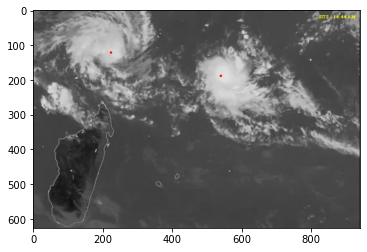

In [14]:
# importing the other two images
img2 = Image.open('./2.jpg')
plt.imshow(img2)
img2 = np.array(img2)

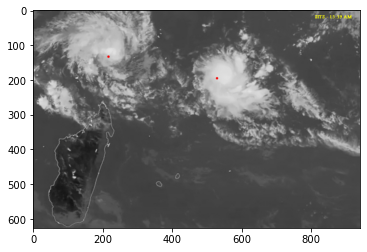

In [15]:
# importing the other two images
img3 = Image.open('./3.jpg')
plt.imshow(img3)
img3 = np.array(img3)

In [16]:
# since the position of the cyclones at the three given instants is not linear,
# we choose the last two points to determine the velocity of the cyclones

# lets first calculate the cordinates of last two positions of belna

[belna_bx , belna_by] = find_center(0 , 100, 150, 200, 250, img2)
print(f'belna_b is at {belna_bx , belna_by}')

[belna_cx , belna_cy] = find_center(0 , 100, 200, 150, 250, img3)
print(f'belna_c is at {belna_cx , belna_cy}')

# calculating the speed using the distance to pixel ratio
time = 55 / 60.0 # in hours
dis_belna = ((belna_bx-belna_cx)**2 + (belna_by-belna_cy)**2) ** 0.5 # in pixels

speed_belna = (dis_belna * dp_ratio) / (time)

print(f'belna is travelling at {speed_belna} km/h')

belna_b is at (121, 223)
belna_c is at (133, 216)
belna is travelling at 63.87111250674912 km/h


In [17]:
# lets calculate the cordinates of last two positions of ambali

[ambali_bx , ambali_by] = find_center(0 , 150, 250, 400, 600, img2)
print(f'ambali_b is at {ambali_bx , ambali_by}')

[ambali_cx , ambali_cy] = find_center(0 , 150, 250, 400, 600, img3)
print(f'ambali_c is at {ambali_cx , ambali_cy}')

# calculating the speed using the distance to pixel ratio
time = 55 / 60.0 # in hours
dis_ambali = ((ambali_bx-ambali_cx)**2 + (ambali_by-ambali_cy)**2) ** 0.5 # in pixels

speed_ambali = (dis_ambali*dp_ratio) / (time)

print(f'ambali is travelling at {speed_ambali} km/h')

ambali_b is at (188, 539)
ambali_c is at (195, 528)
ambali is travelling at 59.94463041825926 km/h


In [19]:
# locating the capital city
[capital_x , capital_y] = find_center(1 , 400, 500, 0, 200, img1)
print(f'capital city is at {capital_x} , {capital_y}')

capital city is at 436 , 139


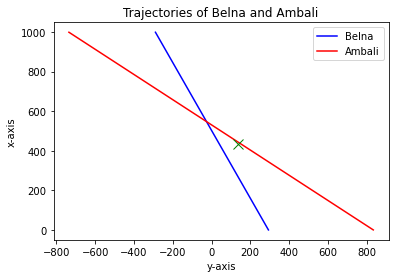

The apojuncture is at (547.3614457831326, -25.710843373494072)


In [23]:
# finding the pixel coordinates of possible collision
# due to inertia both the cyclones move in straight paths
# let trajacetory of belna and ambali be y = f(x) and y = g(x) respectively
# x -> vertical axis , y -> horizontal axis

world_size = 1000


m1 = (belna_cy - belna_by) / float(belna_cx - belna_bx)
m2 = (ambali_cy - ambali_by) / float(ambali_cx - ambali_bx)

c1 = belna_by - m1 * belna_bx
c2 = ambali_by - m2 * ambali_bx

x = np.arange(world_size)

plt.title("Trajectories of Belna and Ambali")
plt.xlabel("y-axis")
plt.ylabel("x-axis")

plt.plot(x * m1 + c1, x , 'blue', label='Belna')
plt.plot(x * m2 + c2, x , 'red', label='Ambali')
plt.legend(loc='upper right')

# marking the capital city on the plot
plt.plot(capital_y, capital_x , marker="x", markersize=10, markeredgecolor="green", markerfacecolor="red")
plt.show()

apo_x = (c1-c2)/(m2-m1)
apo_y = m2*apo_x + c2

print(f'The apojuncture is at {apo_x , apo_y}')

In [24]:
# answering the questions

# locating the capital city
[capital_x , capital_y] = find_center(1 , 400, 500, 0, 200, img1)
print(f'capital city is at {capital_x} , {capital_y}')

dis_apo = (((apo_x-capital_x)**2 + (apo_y-capital_y)**2 ) ** 0.5) * dp_ratio
print(f'apojuncture is at {dis_apo} km from the capital city')

#time taken by belna to reach the apojuncture
dis_apo_belna = (((apo_x-belna_cx)**2 + (apo_y-belna_cy)**2 ) ** 0.5) * dp_ratio
time_belna = dis_apo_belna / speed_belna
print(f'Belna will reach the apo. after {time_belna} hours from the last satellite capture')

#time taken by belna to reach the apojuncture
dis_apo_ambali = (((apo_x-ambali_cx)**2 + (apo_y-ambali_cy)**2 ) ** 0.5) * dp_ratio
time_ambali = dis_apo_ambali / speed_ambali
print(f'Ambali will reach the apo. after {time_ambali} hours from the last satellite capture')

capital city is at 436 , 139
apojuncture is at 837.927318821739 km from the capital city
Belna will reach the apo. after 31.652610441767074 hours from the last satellite capture
Ambali will reach the apo. after 46.142570281124506 hours from the last satellite capture


### CONCLUSION:
    The two cyclones will reach the apojuncture with a time lag of 15 hours apporox. Thus, there would be possibly no collision. The capital city is approximately 838km away from the apojuncture. However, the path of cyclone Ambali passes very close to the capital before collision.

    The assumption we made is that the cyclones travel with constant velocity. This velocity is the average velocity along their respective second and third points. 